### Librerias

In [35]:
using SymPy
using Interpolations
using Plots
using CSV
using DataFrames
using Statistics
using PyCall

### Datos de temperaturas por Dia

In [36]:
function GetTemperaturas(data)
    promedios = []
    for fila in eachrow(data)
        #Datos de temperatura a partir de la segunda columna.
        #Mean para calcular el promedio de las temperaturas dentro de la fila.
        promedio = mean(fila[2:end])
        push!(promedios, promedio)
    end
    return promedios
end

#Leer el archivo CSV
data = CSV.read("temperaturas.csv", DataFrame, header=0)

#Dias en la primera columna.
dias = data[:, 1] 

temperaturas = GetTemperaturas(data)

7-element Vector{Any}:
 23.333333333333332
 24.0
 25.0
 25.666666666666668
 27.0
 22.0
 23.0

### Interpolación de Taylor

## Explicación del Código (Procedimiento)

### Definición de la Función `rango_dias_interpolados(punto_evaluacion)`
Esta función determina el rango de días en los que se realizará la interpolación.
- Si el punto de evaluación es menor que 7, el rango se extiende desde el día mínimo hasta el día 7.
- De lo contrario, el rango se extiende desde el día mínimo hasta el punto de evaluación.

### Construcción de la Función Interpolada (Lagrange)
La función `funcion_interpolada` se construye utilizando el método de interpolación de Lagrange. Para cada día, se calcula un término que se suma a la función interpolada.

### Parámetros para el Polinomio de Taylor
Se solicita al usuario que ingrese el punto de evaluación y el grado del polinomio de Taylor.

### Función `polinomio_taylor(funcion, punto, grado)`
Esta función calcula el polinomio de Taylor alrededor del punto de evaluación para la función dada y con el grado especificado. Se utilizan las derivadas de la función en el punto de evaluación para calcular los términos del polinomio.

### Calculando el Polinomio de Taylor
Se calcula el polinomio de Taylor utilizando la función `polinomio_taylor` con los parámetros especificados.

### Predicción de Temperatura
Se solicita al usuario que ingrese el valor que desea predecir. Luego, se evalúa el polinomio de Taylor en este valor para obtener la predicción de temperatura.

### Graficando los Resultados
Se grafican los datos originales, la función interpolada y el polinomio de Taylor para visualizar los resultados.

### Fórmula Utilizada:

La fórmula utilizada para calcular el polinomio de Taylor es:




### donde: 

- `f^(k)` (punto) representa la `k-enesima derivada` de la función evaluada en el punto y  grado es el grado del polinomio de Taylor.

### Código Completo

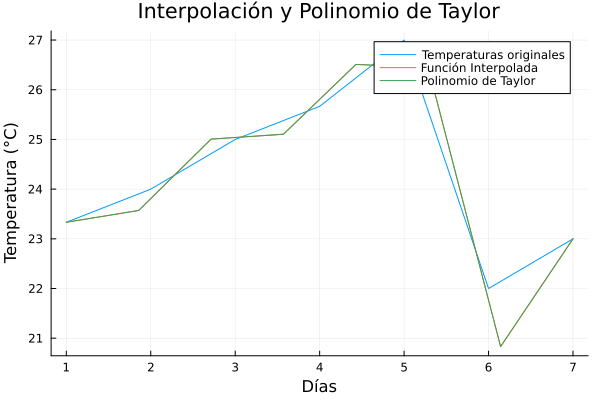

In [37]:
#Función para obtener el rango de días
function DiasInterpolados(punto)
    if punto < 7
        return range(minimum(dias), 7, length=20)
    else
        return range(minimum(dias), punto, length=20)
    end
end

# Definir la variable simbólica x
x = symbols("x")

# Construir la función interpolada (Lagrange)
n = length(dias)
func_interp = 0
for i in 1:n
    term = temperaturas[i]
    for j in 1:n
        if i != j
            term *= (x - dias[j]) / (dias[i] - dias[j])
        end
    end
    func_interp += term
end

# Parámetros para el polinomio de Taylor
print("Coloque punto a evaluar: ")
punto = parse(Float64, readline())
print("coloque grado: ")
grado_taylor = parse(Int64, readline())

# Función para calcular el polinomio de Taylor
function taylor_polynomial(func, punto, grado)
    polinomio_taylor = 0
    for k in 0:grado
        derivada_k = diff(func, x, k)
        derivada_punto = subs(derivada_k, x, punto)
        termino_k = (derivada_punto / factorial(k)) * (x - punto)^k
        polinomio_taylor += termino_k
    end
    return simplify(polinomio_taylor)
end



# Calcular el polinomio de Taylor
polinomio_taylor = taylor_polynomial(func_interp, punto, grado_taylor)


# Crear funciones para evaluar
func_interp_eval = lambdify(func_interp, [x])
polinomio_taylor_eval = lambdify(polinomio_taylor, [x])

# Crear datos para graficar

#colocar prediccion por teclado
print("Coloque el Valor que quiere a predecir: ")
prediccion_taylor_teclado = parse(Float64, readline())

#Asignar valores para graficar
x_vals = DiasInterpolados(prediccion_taylor_teclado)
y_vals_interp = func_interp_eval.(x_vals)
y_vals_taylor = polinomio_taylor_eval.(x_vals)



#imprimir Prediccion
println("la prediccion de la temperatura por teclado es: ", polinomio_taylor_eval(prediccion_taylor_teclado))

# Graficar
plot(dias, temperaturas, seriestype=:scatter, label="Datos Originales", markershape=:circle)
plot!(x_vals, y_vals_interp, label="Función Interpolada")
plot!(x_vals, y_vals_taylor, label="Polinomio de Taylor")
xlabel!("Días")
ylabel!("Temperatura (°C)")
title!("Interpolación y Polinomio de Taylor")

### Interpolación de Lagrange

### La fórmula de Lagrange que se está utilizando en el código es la siguiente:


### Donde:

- `p(x)` = es el polinomio de Lagrange
- `n` es el numero de puntos dados
- `Li(x)` es el término de Lagrange para el punto xi dado por:



- `f(xi)` es el valor de la funcion xi que en este caso es la temperatura registrada en el día xi

Esta fórmula calcula el polinomio de Lagrange que pasa por todos los puntos de datos dados y se utiliza para predecir valores intermedios entre estos puntos.


### Descripción del Código

#### Inicialización de Variables
- `n`: Número de puntos de datos.
- `x`: Variable simbólica.
- `polinomio`: Inicialización del polinomio de Lagrange.
- `divisorL`: Vector para almacenar los denominadores de Lagrange.

#### Función DiasInterpolados
Esta función determina el rango de días sobre los cuales se realizará la interpolación.
- Si el día deseado está más allá del séptimo día, el rango se extiende hasta ese día, de lo contrario, se extiende hasta el día 7.

#### Cálculo del Polinomio de Lagrange
Se itera sobre cada punto de datos para calcular los términos de Lagrange y el polinomio resultante. Se almacenan los denominadores de Lagrange en el vector `divisorL`.

#### Simplificación del Polinomio de Lagrange
Se simplifica el polinomio resultante.

#### Evaluación Numérica del Polinomio de Lagrange
Se define una función que permite evaluar el polinomio en un valor específico de `x`.

#### Ingreso de la Predicción por Teclado
El usuario ingresa el valor del día para el cual se desea realizar la predicción.

#### Generación de Puntos para la Gráfica
Se determina el rango de días sobre los cuales se graficarán los resultados de la interpolación.

#### Predicción e Impresión
Se realiza la predicción de temperatura para el día ingresado por el usuario y se imprime el resultado.

#### Gráfico
Se grafican los datos originales, la interpolación de Lagrange y los puntos de datos registrados.

### Código Completo

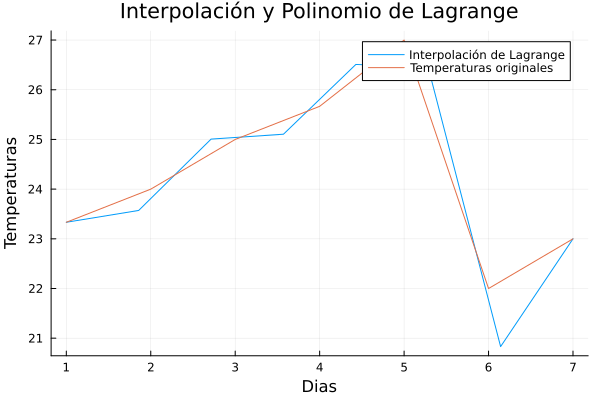

In [38]:
# Polinomio de Lagrange
n = length(dias)  # Número de puntos de datos
x = symbols("x")  # Variable simbólica x
polinomio = 0  # Inicialización del polinomio de Lagrange
divisorL = zeros(Float64, n)  # Vector para almacenar los denominadores de Lagrange

# Función para obtener el rango de días interpolados
function DiasInterpolados(punto)
    if punto < 7
        return range(minimum(dias), 7, length=20)  # Rango de días desde el mínimo hasta 7
    else
        return range(minimum(dias), punto, length=20)  # Rango de días desde el mínimo hasta el punto dado
    end
end

# Cálculo del polinomio de Lagrange
for i in 1:n
    # Termino de Lagrange
    numerador = 1
    denominador = 1

    for j in 1:n
        if j != i
            numerador *= (x - dias[j])  # Producto acumulativo para el numerador de Lagrange
            denominador *= (dias[i] - dias[j])  # Producto acumulativo para el denominador de Lagrange
        end
    end

    terminoLi = numerador / denominador  # Término de Lagrange
    polinomio += terminoLi * temperaturas[i]  # Actualización del polinomio de Lagrange
    divisorL[i] = denominador  # Almacenamiento del denominador de Lagrange
end

# Simplificación del polinomio de Lagrange
polisimple = simplify(polinomio)

# Evaluación numérica del polinomio de Lagrange
px = lambdify(polinomio, [x])

# Ingreso de la predicción por teclado
print("Ingrese el valor que desea predecir: ")
punto = parse(Float64, readline())

# Puntos para la gráfica
pdias = DiasInterpolados(punto)
ptemperaturas = px.(pdias)


# Predicción e impresión
println("La predicción de la temperatura es: ", px(punto))

# Gráfica
plot(pdias, ptemperaturas, xlabel="Días", ylabel="Temperaturas", label="Interpolación de Lagrange")
scatter!(dias, temperaturas, label="Puntos de datos", legend=:bottomright)
title!("Interpolación y Polinomio de Lagrange")

Interpolación de Hermite:

La interpolación de Hermite es un método en matemáticas que se utiliza paraconstruir un polinomio 
que no solo coincide con los valores de una función en un conjunto dado de puntos, sino que también
coincide con las derivadas de la función en esos puntos. Este tipo de interpolación es
especialmente útil cuando se conoce no solo la posición de los puntos, sino también la
pendiente (o derivada) de la curva en esos puntos.
También veremos los polinomios de Lagrange son útiles para 
construir los términos necesarios que satisfacen las condiciones de interpolación de Hermite. 

Su fórmula:
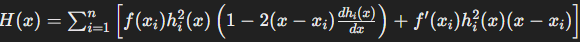

Dónde:

1) hi(x) es el polinomio de Lagrange para el nodo i.

2) 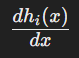 es la derivada del polinomio de Lagrange para el nodo i



Veamos las representaciones en el código:

a. "lagrange" representa hi(x)

b. "lagrange_derivada" representa 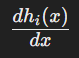

c. En el resultado final; "valorFuncion * lagrange^2 * (1 - 2 * (puntoDado - nodos[i]) * lagrange_derivada)" 
representa la primera parte de la fórmula de Hermite ya mostrada anteriormente.

d. Y la otra parte de la fórmula en el resultado es "valorDerivada * lagrange^2 * (puntoDado - nodos[i])"


La predicción de la temperatura para el día 8 es: -1.7337732999999996e6 °C.


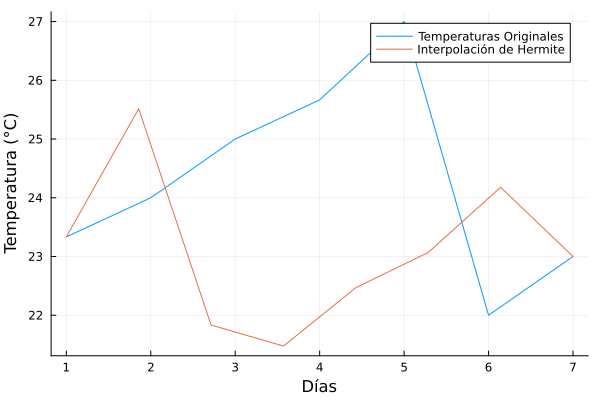

In [44]:

# Graficar los datos originales
plot(dias, temperaturas, xlabel="Días", ylabel="Temperatura (°C)", label="Temperaturas Originales")

# Importamos NumPy
np = pyimport("numpy")

# Función para calcular derivadas usando diferencias finitas
function calcular_derivadas(x, y)
    # Convertimos los datos de los parámetros de la función a arrays de NumPy
    x_numpy = np.array(x)
    y_numpy = np.array(y)
    derivada_numpy = np.gradient(y_numpy,x_numpy) # Calcula la derivada (diferencia finita)
    # Convertir las derivadas de numpy a un arreglo de Julia
    dy = Float64.(derivada_numpy)
    return dy
end

# Usamos la función "calcular_derivadas"
derivadas = calcular_derivadas(dias, temperaturas)

# Función para calcular el punto de hermite en un punto dado "t" 
function hermite(puntoDado, nodos, funcion, funcion_derivada)

    # Almacenamos el número de nodos (puntos donde se intersectan las funciones y sus derivadas)
    numNodos = length(nodos)
    # Inicializamos el resultado de la interpolación Hermite en 0
    resultado = 0.0

    # Itera sobre cada nodo
    for i in 1:numNodos # Para i desde 1 hasta la cantidad de nodos (incluyéndolo)
        valorFuncion = funcion[i] # Guardamos el valor de la función en el nodo i
        valorDerivada = funcion_derivada[i] # Guardamos la derivada del valor de la función en el nodo i

        # Inicializar el polinomio de Lagrange y su derivada
        lagrange = 1.0
        lagrange_derivada = 0.0


        # Calculamos el polinomio de lagrange y su derivada (para el nodo i)
        for j in 1:numNodos
            if i != j

                #= 
                Actualizamos lagrange multiplicandolo por el factor correspondiente
                en función de la diferencia entre el punto de interpolación y el nodo actual
                =#
                lagrange *= (puntoDado - nodos[j]) / (nodos[i] - nodos[j])

                #=
                Actualizamos la derivada del polinomio de lagrange sumandolo con la inversa
                de la diferencia entre el nodo de iteracion y el nodo actual
                =#
                lagrange_derivada += 1 / (nodos[i] - nodos[j])
            end
        end


        #= 
        Multiplicamos la derivada de lagrange por la lagrange calculada 
        para obtener una expresión que tenga en cuenta tanto los valores de la 
        función como sus derivadas en el nodo i
        =#
        lagrange_derivada *= lagrange

        # Aplicamos la fórmula de Hermite 
        resultado += valorFuncion * lagrange^2 * (1 - 2 * (puntoDado - nodos[i]) * lagrange_derivada) + valorDerivada * lagrange^2 * (puntoDado - nodos[i])
    end
    return resultado
end

# Evaluar la interpolación
dias_interpolados = DiasInterpolados()
temperaturas_interpoladas = [hermite(d, dias, temperaturas, derivadas) for d in dias_interpolados]


# Predicción de un nuevo día:
otroDia=8
temperatura_prediccion =  hermite(otroDia, dias, temperaturas, derivadas)
println("La predicción de la temperatura para el día $otroDia es: $temperatura_prediccion °C.")
# Graficar la interpolación de Hermite
# plot! para añadir una nueva barra de gráfica y ver tanto la de Hermites como la de los datos originales
plot!(dias_interpolados, temperaturas_interpoladas, label="Interpolación de Hermite")



Interpolación Polinómica a Trozos

Formula de interpolación lineal usada en el ejercicio:

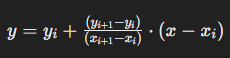

Donde:
- y es el valor interpolado que queremos encontrar.
- x es el punto en el cual queremos interpolar.
- 𝑥𝑖+1 son los puntos conocidos entre los cuales estamos interpolando.
- 𝑦𝑖 y 𝑦𝑖+1 son los valores conocidos en 𝑥𝑖 y 𝑥𝑖+1, respectivamente.

**y = temperaturas**

**x = dias**

Temperatura en el día 10 según la interpolación lineal a trozos: 26.0


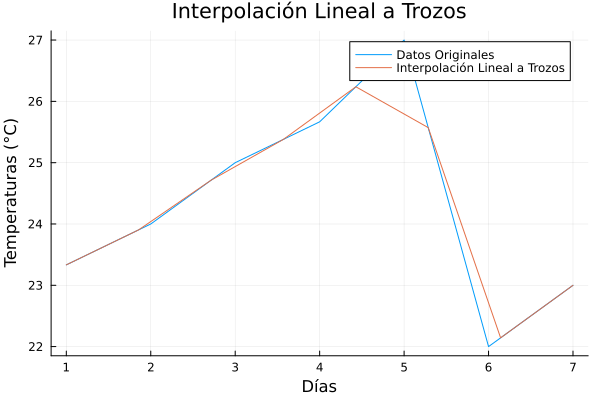

In [118]:
# Función de interpolación lineal a trozos
function InterpolacionLinealTrozos(dias, temperaturas, cantidad_interpolar)
    # Obtiene el valor de las listas y busca el valor interpolado de la temperatura a partir de la cantidad de interpolación
    
    # Encontrar el intervalo correcto
    for i in 1:length(dias)-1
        # Recorre los dias hasta encontrar el intervalo de dias que corresponda a la cantidad de interpolación
        if cantidad_interpolar >= dias[i] && cantidad_interpolar <= dias[i+1]
            # Calcular la interpolación lineal
            return temperaturas[i] + ((temperaturas[i+1] - temperaturas[i]) * (cantidad_interpolar - dias[i]) / (dias[i+1] - dias[i]))
        end
    end
    # Casos usados para obtener la interpolación en dias que no estan incluidos dentro de la lista inicial de dias, predicción de datos
    # Caso especial: extrapolación hacia la izquierda
    if cantidad_interpolar < dias[1]
        return temperaturas[1] + ((temperaturas[2] - temperaturas[1]) * (cantidad_interpolar - dias[1]) / (dias[2] - dias[1]))
    end
    # Caso especial: extrapolación hacia la derecha
    if cantidad_interpolar > dias[end]
        return temperaturas[end] + ((temperaturas[end] - temperaturas[end-1]) * (cantidad_interpolar - dias[end]) / (dias[end] - dias[end-1]))
    end
    return NaN  # Si la cantidad de interpolación está fuera del rango de dias
end

day = try
        readline()
    catch
        "8"
    end
println("Temperatura en el día " * day * " según la interpolación lineal a trozos: ", InterpolacionLinealTrozos(dias, temperaturas, parse(Int, day)))

# Crear puntos interpolados
dias_interpolados = DiasInterpolados()
temperaturas_interpoladas = [InterpolacionLinealTrozos(dias, temperaturas, cantidad_interpolar) for cantidad_interpolar in dias_interpolados]

# Graficar los puntos originales y la interpolación
plot(dias, temperaturas, label="Datos Originales", xlabel="Días", ylabel="Temperaturas (°C)", title="Interpolación Lineal a Trozos")
plot!(dias_interpolados, temperaturas_interpoladas, label="Interpolación Lineal a Trozos")
